In [617]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eig

# Criar FRF a partir do CSV FRF_easy_to_import.xlsx

In [618]:
df = pd.read_excel("D:\\UFSC\\Vibes\\Cordioli\\Trabalho\\Grupo 6\\FRF_easy_to_import.xlsx")

In [619]:
df.columns

Index(['Frequencia', 'Signal 2 (Real)', 'Signal 2 (Imag.)', 'Signal 3 (Real)',
       'Signal 3 (Imag.)', 'Signal 4 (Real)', 'Signal 4 (Imag.)'],
      dtype='object')

In [620]:
print(type(df['Frequencia'][0]))
print(type(df['Signal 2 (Real)'][0]))
print(type(df['Signal 2 (Imag.)'][0]))
print(type(df['Signal 3 (Real)'][0]))
print(type(df['Signal 3 (Imag.)'][0]))
print(type(df['Signal 4 (Real)'][0]))
print(type(df['Signal 4 (Imag.)'][0]))

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>


# Plotando os gráfico das FRF experimentais

In [621]:
freq = df['Frequencia']
print(len(freq))

801


In [622]:
frf_2_andar = np.abs(df['Signal 2 (Imag.)']) + np.abs(df['Signal 2 (Real)'])
print(frf_2_andar.shape)

(801,)


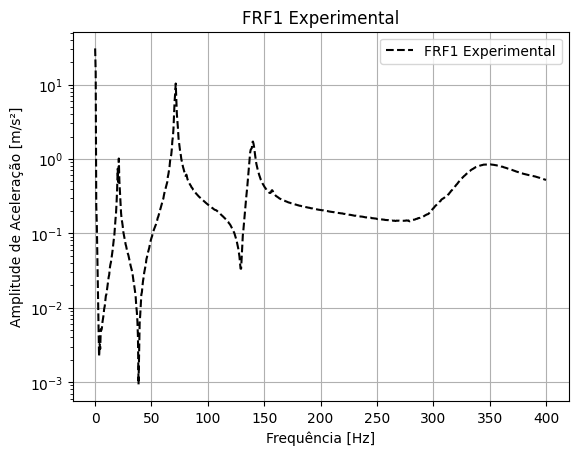

In [623]:
# Plotar gráfico da FRF do primeiro andar
frf_1_andar = np.abs(df['Signal 2 (Imag.)']) + np.abs(df['Signal 2 (Real)']) # Obtém-se o módulo da FRF

plt.plot(freq, frf_1_andar, 'black', label='FRF1 Experimental', ls='--')
plt.xlabel('Frequência [Hz]')
plt.ylabel('Amplitude de Aceleração [m/s²]')
plt.title('FRF1 Experimental')
plt.grid()
plt.legend()
plt.yscale('log')
plt.savefig("D:\\UFSC\\Vibes\\Cordioli\\Trabalho\\Grupo 6\\FRF1_andar.png")
plt.show()

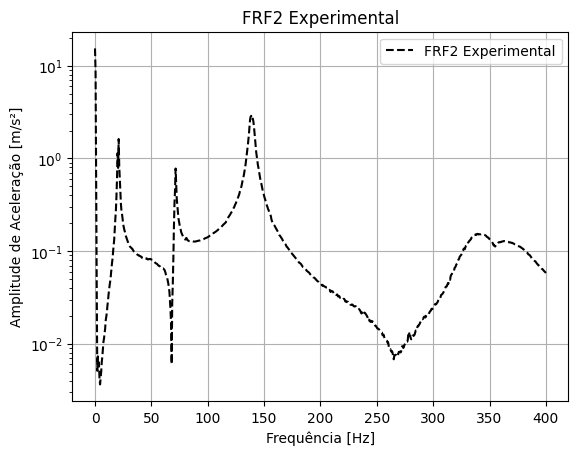

In [624]:
# Plotar gráfico da FRF do segundo andar
frf_2_andar = np.abs(df['Signal 3 (Imag.)']) + np.abs(df['Signal 3 (Real)']) # Obtém-se o módulo da FRF

plt.plot(freq, frf_2_andar, 'black', label='FRF2 Experimental', ls='--')
plt.xlabel('Frequência [Hz]')
plt.ylabel('Amplitude de Aceleração [m/s²]')
plt.title('FRF2 Experimental')
plt.grid()
plt.legend()
plt.yscale('log')
plt.savefig("D:\\UFSC\\Vibes\\Cordioli\\Trabalho\\Grupo 6\\FRF2_andar.png")
plt.show()

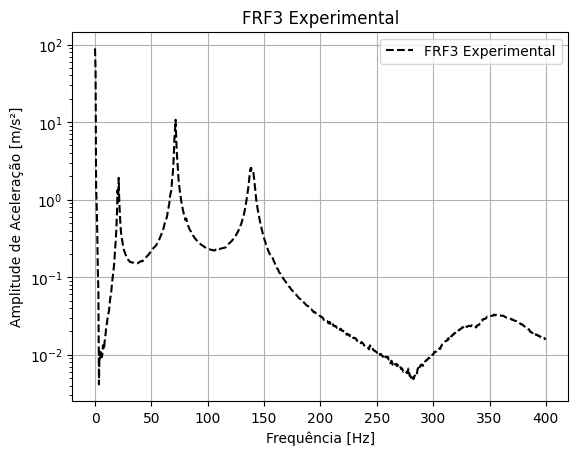

In [625]:
# Plotar gráfico da FRF do terceiro andar
frf_3_andar = np.abs(df['Signal 4 (Imag.)']) + np.abs(df['Signal 4 (Real)']) # Obtém-se o módulo da FRF

plt.plot(freq, frf_3_andar, 'black', label='FRF3 Experimental', ls='--')
plt.xlabel('Frequência [Hz]')
plt.ylabel('Amplitude de Aceleração [m/s²]')
plt.title('FRF3 Experimental')
plt.legend()
plt.grid()
plt.yscale('log')
plt.savefig("D:\\UFSC\\Vibes\\Cordioli\\Trabalho\\Grupo 6\\FRF3_andar.png")
plt.show()

# Salvando as FRF de cada andar

In [626]:
frf_1_andar.to_excel('D:\\UFSC\\Vibes\\Cordioli\\Trabalho\\Grupo 6\\frf_1_andar.xlsx')
frf_2_andar.to_excel('D:\\UFSC\\Vibes\\Cordioli\\Trabalho\\Grupo 6\\frf_2_andar.xlsx')
frf_3_andar.to_excel('D:\\UFSC\\Vibes\\Cordioli\\Trabalho\\Grupo 6\\frf_3_andar.xlsx')

# Amortecimentos no Primeiro andar

In [627]:
frf_1_andar = np.abs(df['Signal 2 (Imag.)']) + np.abs(df['Signal 2 (Real)']) 
freq = df['Frequencia']
print(frf_1_andar.shape)
print(freq.shape)

(801,)
(801,)


In [628]:
w_1 = []
w_2 = []
w_n = []

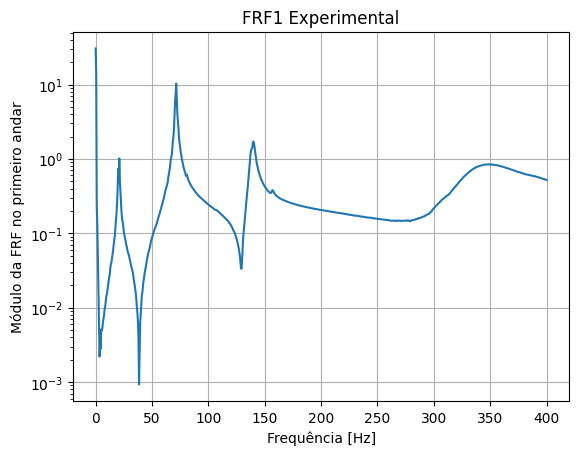

In [629]:
maior = frf_1_andar[2]
cont = 0
for i in range(2, 50):
    if frf_1_andar[i] > maior:
        maior = frf_1_andar[i]
        cont = i

w_n.append(freq[cont])

print(maior)
print(maior/np.sqrt(2))
print(cont)
print(freq[cont])

1.0129031
0.7162306506948756
42
21.0


In [630]:
def linear_interpolation(x, y, y_interp):
    # Verifica se y_interp está fora do intervalo
    if y_interp < min(y) or y_interp > max(y):
        return None
    
    # Encontra os índices dos pontos mais próximos de y_interp
    idx = np.searchsorted(y, y_interp, side='right')
    idx -= 1
    
    # Calcula a diferença entre os valores de y próximos
    diff_y = y[idx+1] - y[idx]
    diff_x = x[idx+1] - x[idx]
    
    # Calcula a diferença proporcional entre y_interp e os valores de y
    diff_y_interp = y_interp - y[idx]
    
    # Calcula a proporção entre as diferenças de x e y
    proportion = diff_y_interp / diff_y
    
    # Interpola o valor de x correspondente a y_interp
    x_interp = x[idx] + proportion * diff_x
    
    return x_interp

In [631]:
x = [41*0.5, 21]
y = [0.4875502, 1.0129031]
y_interp = 0.7162306506948756

x_interp = linear_interpolation(x, y, y_interp)

w_1.append(x_interp)

print(x_interp)

20.71764460679181


In [632]:
x = [19.5, 20]
y = [0.38753028, 0.73591509]
y_interp = 0.7162306506948756

x_interp = linear_interpolation(x, y, y_interp)

# w_1.append(x_interp)

if x_interp is not None:
    print("Valor de x para y =", y_interp, "é aproximadamente:", x_interp)
else:
    print("O valor de y_interp está fora do intervalo de interpolação.")


Valor de x para y = 0.7162306506948756 é aproximadamente: 19.971748998894178


In [633]:
x = [21.5, 21]
y = [0.50667976, 1.0129031]
y_interp = 0.7162306506948756

x_interp = linear_interpolation(x, y, y_interp)

w_2.append(x_interp)

if x_interp is not None:
    print("Valor de x para y =", y_interp, "é aproximadamente:", x_interp)
else:
    print("O valor de y_interp está fora do intervalo de interpolação.")


Valor de x para y = 0.7162306506948756 é aproximadamente: 21.29302525769073


In [634]:
print(maior/np.sqrt(2))

0.7162306506948756


In [635]:
maior = frf_1_andar[50]
cont = 0
for i in range(50, 200):
    if frf_1_andar[i] > maior:
        maior = frf_1_andar[i]
        cont = i

w_n.append(freq[cont])

print(maior)
print(maior/np.sqrt(2))
print(cont)
print(freq[cont])

10.328243
7.303170663042491
143
71.5


In [636]:
x = [70.5, 71]
y = [5.987467, 7.587771]
y_interp = 7.303170663042491

x_interp = linear_interpolation(x, y, y_interp)

w_1.append(x_interp)

if x_interp is not None:
    print("Valor de x para y =", y_interp, "é aproximadamente:", x_interp)
else:
    print("O valor de y_interp está fora do intervalo de interpolação.")


Valor de x para y = 7.303170663042491 é aproximadamente: 70.91107928963575


In [637]:
x = [72, 71.5]
y = [6.598632, 10.328243]
y_interp = 7.303170663042491

x_interp = linear_interpolation(x, y, y_interp)

w_2.append(x_interp)

if x_interp is not None:
    print("Valor de x para y =", y_interp, "é aproximadamente:", x_interp)
else:
    print("O valor de y_interp está fora do intervalo de interpolação.")


Valor de x para y = 7.303170663042491 é aproximadamente: 71.90554796960829


In [638]:
print(freq[144])
print(frf_1_andar[144])
print(freq[143])
print(frf_1_andar[143])

72.0
6.598632
71.5
10.328243


In [639]:
print(freq[141])
print(frf_1_andar[141])
print(freq[142])
print(frf_1_andar[142])

70.5
5.9874670000000005
71.0
7.587771


In [640]:
print(maior/np.sqrt(2))

7.303170663042491


In [641]:
maior = frf_1_andar[50]
cont = 0
for i in range(200, len(frf_1_andar)):
    if frf_1_andar[i] > maior:
        maior = frf_1_andar[i]
        cont = i

w_n.append(freq[cont])

print(maior)
print(maior/np.sqrt(2))
print(cont)
print(freq[cont])

1.7128028
1.2111344747153059
280
140.0


In [642]:
x = [137.5, 138]
y = [1.2081656, 1.3307448]
y_interp = 1.2111344747153059

x_interp = linear_interpolation(x, y, y_interp)

w_1.append(x_interp)

if x_interp is not None:
    print("Valor de x para y =", y_interp, "é aproximadamente:", x_interp)
else:
    print("O valor de y_interp está fora do intervalo de interpolação.")


Valor de x para y = 1.2111344747153059 é aproximadamente: 137.512110026478


In [643]:
print(freq[275])
print(frf_1_andar[275])
print(freq[276])
print(frf_1_andar[276])

137.5
1.2081656
138.0
1.3307448


In [644]:
x = [284*0.5 ,283*0.5]
y = [1.0990418 ,1.2538949]
y_interp = 1.2111344747153059

x_interp = linear_interpolation(x, y, y_interp)

w_2.append(x_interp)

if x_interp is not None:
    print("Valor de x para y =", y_interp, "é aproximadamente:", x_interp)
else:
    print("O valor de y_interp está fora do intervalo de interpolação.")


Valor de x para y = 1.2111344747153059 é aproximadamente: 141.6380677083142


In [645]:
print(freq[284])
print(frf_1_andar[284])
print(freq[283])
print(frf_1_andar[283])

142.0
1.0990418
141.5
1.2538949


In [646]:
print(maior/np.sqrt(2))

1.2111344747153059


## Calcular o amortecimento a partir da Banda de Meia-Potência

Antes disso converter Hz para rad/s

In [647]:
print(w_n)
print(w_1)
print(w_2)
q_si_1 = []

[21.0, 71.5, 140.0]
[20.71764460679181, 70.91107928963575, 137.512110026478]
[21.29302525769073, 71.90554796960829, 141.6380677083142]


In [648]:
for i in range(0, len(w_n)):
    w_n[i] = w_n[i]*2*np.pi

for i in range(0, len(w_1)):
    w_1[i] = w_1[i]*2*np.pi

for i in range(0, len(w_2)):
    w_2[i] = w_2[i]*2*np.pi

In [649]:
print(w_n)
print(w_1)
print(w_2)

[131.94689145077132, 449.2477494633404, 879.645943005142]
[130.1728001927627, 445.547451508886, 864.0140692776293]
[133.7880234445262, 451.79588250733974, 889.9382259621872]


In [650]:
for i in range(0,3):
    q_si_1.append((w_2[i] - w_1[i]) / (2 * w_n[i]))

**qsi** do primeiro andar obtido.

In [651]:
q_si_1

[0.013699539307117047, 0.0069543264333743905, 0.014735563149414927]

# Amortecimentos no Segundo andar

In [652]:
frf_2_andar = np.abs(df['Signal 3 (Imag.)']) + np.abs(df['Signal 3 (Real)']) 
freq = df['Frequencia']

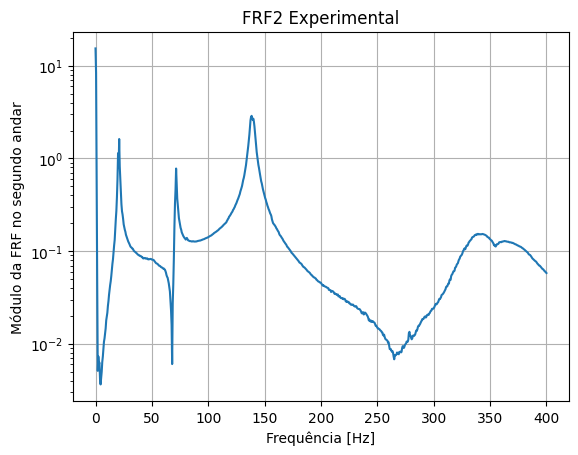

In [653]:
w_n = []
w_1 = []
w_2 = []

In [654]:
def linear_interpolation(x, y, y_interp):
    # Verifica se y_interp está fora do intervalo
    if y_interp < min(y) or y_interp > max(y):
        return None
    
    # Encontra os índices dos pontos mais próximos de y_interp
    idx = np.searchsorted(y, y_interp, side='right')
    idx -= 1
    
    # Calcula a diferença entre os valores de y próximos
    diff_y = y[idx+1] - y[idx]
    diff_x = x[idx+1] - x[idx]
    
    # Calcula a diferença proporcional entre y_interp e os valores de y
    diff_y_interp = y_interp - y[idx]
    
    # Calcula a proporção entre as diferenças de x e y
    proportion = diff_y_interp / diff_y
    
    # Interpola o valor de x correspondente a y_interp
    x_interp = x[idx] + proportion * diff_x
    
    return x_interp

In [655]:
maior = frf_2_andar[2]
cont = 0
for i in range(2, 50):
    if frf_2_andar[i] > maior:
        maior = frf_2_andar[i]
        cont = i

w_n.append(freq[cont])

print(maior)
print(maior/np.sqrt(2))
print(cont)
print(freq[cont])

1.6221873
1.1470596401846962
42
21.0


In [656]:
x = [20.5 ,21]
y = [0.7906137 ,1.6221873]
y_interp = 1.1470596401846962

x_interp = linear_interpolation(x, y, y_interp)

w_1.append(x_interp)

if x_interp is not None:
    print("Valor de x para y =", y_interp, "é aproximadamente:", x_interp)
else:
    print("O valor de y_interp está fora do intervalo de interpolação.")


Valor de x para y = 1.1470596401846962 é aproximadamente: 20.714320139663343


In [657]:
print(freq[41])
print(frf_2_andar[41])
print(freq[42])
print(frf_2_andar[42])

20.5
0.7906137
21.0
1.6221873


In [658]:
x = [43*0.5 ,21]
y = [0.82167842 ,1.6221873]
y_interp = 1.1470596401846962

x_interp = linear_interpolation(x, y, y_interp)

w_2.append(x_interp)

if x_interp is not None:
    print("Valor de x para y =", y_interp, "é aproximadamente:", x_interp)
else:
    print("O valor de y_interp está fora do intervalo de interpolação.")


Valor de x para y = 1.1470596401846962 é aproximadamente: 21.296766014522728


In [659]:
print(freq[43])
print(frf_2_andar[43])

21.5
0.82167842


In [660]:
maior = frf_2_andar[50]
cont = 0
for i in range(50, 200):
    if frf_2_andar[i] > maior:
        maior = frf_2_andar[i]
        cont = i

w_n.append(freq[cont])

print(maior)
print(maior/np.sqrt(2))
print(cont)
print(freq[cont])

0.7791773
0.5509615525766248
143
71.5


In [661]:
x = [71 ,71.5]
y = [0.46226258, 0.7791773]
y_interp = 0.5509615525766248

x_interp = linear_interpolation(x, y, y_interp)

w_1.append(x_interp)

if x_interp is not None:
    print("Valor de x para y =", y_interp, "é aproximadamente:", x_interp)
else:
    print("O valor de y_interp está fora do intervalo de interpolação.")


Valor de x para y = 0.5509615525766248 é aproximadamente: 71.1399413895584


In [662]:
print(freq[142])
print(frf_2_andar[142])
print(freq[143])
print(frf_2_andar[143])

71.0
0.46226258
71.5
0.7791773


In [663]:
x = [72 ,71.5]
y = [0.5430588, 0.7791773]
y_interp = 0.5509615525766248

x_interp = linear_interpolation(x, y, y_interp)

w_2.append(x_interp)

if x_interp is not None:
    print("Valor de x para y =", y_interp, "é aproximadamente:", x_interp)
else:
    print("O valor de y_interp está fora do intervalo de interpolação.")


Valor de x para y = 0.5509615525766248 é aproximadamente: 71.9832652829477


In [664]:
print(freq[144])
print(frf_2_andar[144])

72.0
0.5430588000000001


In [665]:
maior = frf_2_andar[50]
cont = 0
for i in range(200, len(frf_2_andar)):
    if frf_2_andar[i] > maior:
        maior = frf_2_andar[i]
        cont = i

w_n.append(freq[cont])

print(maior)
print(maior/np.sqrt(2))
print(cont)
print(freq[cont])

2.8845606999999998
2.039692431714214
277
138.5


In [666]:
x = [136.5 ,137]
y = [1.8076991, 2.2046804]
y_interp = 2.039692431714214

x_interp = linear_interpolation(x, y, y_interp)

w_1.append(x_interp)

if x_interp is not None:
    print("Valor de x para y =", y_interp, "é aproximadamente:", x_interp)
else:
    print("O valor de y_interp está fora do intervalo de interpolação.")


Valor de x para y = 2.039692431714214 é aproximadamente: 136.79219680084958


In [667]:
print(freq[273])
print(frf_2_andar[273])
print(freq[274])
print(frf_2_andar[274])

136.5
1.8076991
137.0
2.2046804


In [668]:
x = [141.5 ,141]
y = [1.875465, 2.218598]
y_interp = 2.039692431714214

x_interp = linear_interpolation(x, y, y_interp)

w_2.append(x_interp)

if x_interp is not None:
    print("Valor de x para y =", y_interp, "é aproximadamente:", x_interp)
else:
    print("O valor de y_interp está fora do intervalo de interpolação.")


Valor de x para y = 2.039692431714214 é aproximadamente: 141.26069420353883


In [669]:
print(freq[283])
print(frf_2_andar[283])
print(freq[282])
print(frf_2_andar[282])

141.5
1.8754650000000002
141.0
2.218598


## Calcular o amortecimento a partir da Banda de Meia-Potência

Antes disso converter Hz para rad/s

In [670]:
print(w_n)
print(w_1)
print(w_2)
q_si_2 = []

[21.0, 71.5, 138.5]
[20.714320139663343, 71.1399413895584, 136.79219680084958]
[21.296766014522728, 71.9832652829477, 141.26069420353883]


In [671]:
for i in range(0, len(w_n)):
    w_n[i] = w_n[i]*2*np.pi

for i in range(0, len(w_1)):
    w_1[i] = w_1[i]*2*np.pi

for i in range(0, len(w_2)):
    w_2[i] = w_2[i]*2*np.pi

In [672]:
print(w_n)
print(w_1)
print(w_2)

[131.94689145077132, 449.2477494633404, 870.2211650443727]
[130.1519119497469, 446.98543449249024, 859.4907210759164]
[133.81152731289075, 452.28419478862736, 887.5671183016638]


In [673]:
for i in range(0,3):
    q_si_2.append((w_2[i] - w_1[i]) / (2 * w_n[i]))

**qsi** do segundo andar obtido.

In [674]:
q_si_2

[0.013867758925223432, 0.005897369883841241, 0.01613175957649553]

# Amortecimentos no Terceiro Andar

In [675]:
frf_3_andar = np.abs(df['Signal 4 (Imag.)']) + np.abs(df['Signal 4 (Real)'])
freq = df['Frequencia']

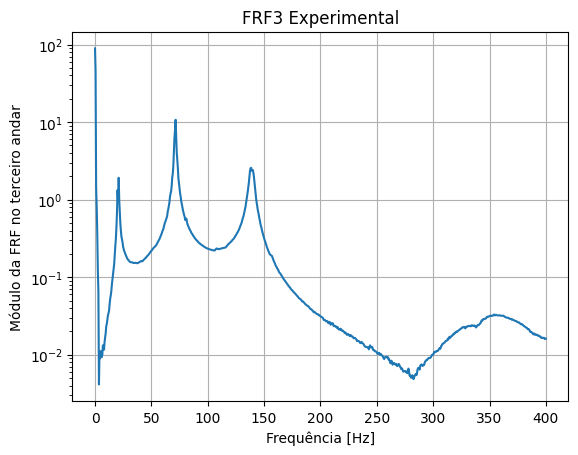

In [676]:
w_n = []
w_1 = []
w_2 = []

In [677]:
def linear_interpolation(x, y, y_interp):
    # Verifica se y_interp está fora do intervalo
    if y_interp < min(y) or y_interp > max(y):
        return None
    
    # Encontra os índices dos pontos mais próximos de y_interp
    idx = np.searchsorted(y, y_interp, side='right')
    idx -= 1
    
    # Calcula a diferença entre os valores de y próximos
    diff_y = y[idx+1] - y[idx]
    diff_x = x[idx+1] - x[idx]
    
    # Calcula a diferença proporcional entre y_interp e os valores de y
    diff_y_interp = y_interp - y[idx]
    
    # Calcula a proporção entre as diferenças de x e y
    proportion = diff_y_interp / diff_y
    
    # Interpola o valor de x correspondente a y_interp
    x_interp = x[idx] + proportion * diff_x
    
    return x_interp

In [678]:
maior = frf_3_andar[2]
cont = 0
for i in range(2, 50):
    if frf_3_andar[i] > maior:
        maior = frf_3_andar[i]
        cont = i
    
w_n.append(freq[cont])

print(maior)
print(maior/np.sqrt(2))
print(cont)
print(freq[cont])

1.9153889
1.3543844797994418
42
21.0


In [679]:
x = [20.5 ,21]
y = [0.9371715 ,1.9153889]
y_interp = 1.3543844797994418

x_interp = linear_interpolation(x, y, y_interp)

w_1.append(x_interp)

if x_interp is not None:
    print("Valor de x para y =", y_interp, "é aproximadamente:", x_interp)
else:
    print("O valor de y_interp está fora do intervalo de interpolação.")

Valor de x para y = 1.3543844797994418 é aproximadamente: 20.713251665631507


In [680]:
print(freq[41])
print(frf_3_andar[41])
print(freq[42])
print(frf_3_andar[42])

20.5
0.9371715
21.0
1.9153889


In [681]:
x = [21.5 ,21]
y = [0.97668325 ,1.9153889]
y_interp = 1.3543844797994418

x_interp = linear_interpolation(x, y, y_interp)

w_2.append(x_interp)

if x_interp is not None:
    print("Valor de x para y =", y_interp, "é aproximadamente:", x_interp)
else:
    print("O valor de y_interp está fora do intervalo de interpolação.")

Valor de x para y = 1.3543844797994418 é aproximadamente: 21.298818069434525


In [682]:
print(freq[43])
print(frf_3_andar[43])

21.5
0.97668325


In [683]:
maior = frf_3_andar[50]
cont = 0
for i in range(50, 200):
    if frf_3_andar[i] > maior:
        maior = frf_3_andar[i]
        cont = i

w_n.append(freq[cont])

print(maior)
print(maior/np.sqrt(2))
print(cont)
print(freq[cont])

10.731814
7.588538453832727
143
71.5


In [684]:
x = [70.5 ,71]
y = [6.358449 ,8.02145]
y_interp = 7.588538453832727

x_interp = linear_interpolation(x, y, y_interp)

w_1.append(x_interp)

if x_interp is not None:
    print("Valor de x para y =", y_interp, "é aproximadamente:", x_interp)
else:
    print("O valor de y_interp está fora do intervalo de interpolação.")

Valor de x para y = 7.588538453832727 é aproximadamente: 70.86984026282387


In [685]:
print(freq[141])
print(frf_3_andar[141])
print(freq[142])
print(frf_3_andar[142])

70.5
6.358449
71.0
8.02145


In [686]:
x = [144*0.5, 143*0.5]
y = [6.819267, 10.731814]
y_interp = 7.588538453832727

x_interp = linear_interpolation(x, y, y_interp)

w_2.append(x_interp)

if x_interp is not None:
    print("Valor de x para y =", y_interp, "é aproximadamente:", x_interp)
else:
    print("O valor de y_interp está fora do intervalo de interpolação.")

Valor de x para y = 7.588538453832727 é aproximadamente: 71.90169172998654


In [687]:
print(freq[144])
print(frf_3_andar[144])
print(freq[143])
print(frf_3_andar[143])

72.0
6.819267
71.5
10.731814


In [688]:
maior = frf_3_andar[50]
cont = 0
for i in range(200, len(frf_3_andar)):
    if frf_3_andar[i] > maior:
        maior = frf_3_andar[i]
        cont = i

w_n.append(freq[cont])

print(maior)
print(maior/np.sqrt(2))
print(cont)
print(freq[cont])

2.5768638
1.8221178671741352
277
138.5


In [689]:
x = [273*0.5, 274*0.5]
y = [1.6704992, 2.0205952]
y_interp = 1.8221178671741352

x_interp = linear_interpolation(x, y, y_interp)

w_1.append(x_interp)

if x_interp is not None:
    print("Valor de x para y =", y_interp, "é aproximadamente:", x_interp)
else:
    print("O valor de y_interp está fora do intervalo de interpolação.")

Valor de x para y = 1.8221178671741352 é aproximadamente: 136.71653870249037


In [690]:
print(freq[273])
print(frf_3_andar[273])
print(freq[274])
print(frf_3_andar[274])

136.5
1.6704992
137.0
2.0205952


In [691]:
x = [141.5, 141]
y = [1.6434072, 1.9572694]
y_interp = 1.8221178671741352

x_interp = linear_interpolation(x, y, y_interp)

w_2.append(x_interp)

if x_interp is not None:
    print("Valor de x para y =", y_interp, "é aproximadamente:", x_interp)
else:
    print("O valor de y_interp está fora do intervalo de interpolação.")

Valor de x para y = 1.8221178671741352 é aproximadamente: 141.21530393406064


In [692]:
print(freq[283])
print(frf_3_andar[283])
print(freq[282])
print(frf_3_andar[282])

141.5
1.6434072
141.0
1.9572694


## Calcular o amortecimento a partir da Banda de Meia-Potência

Antes disso converter Hz para rad/s

In [693]:
print(w_n)
print(w_1)
print(w_2)
q_si_3 = []

[21.0, 71.5, 138.5]
[20.713251665631507, 70.86984026282387, 136.71653870249037]
[21.298818069434525, 71.90169172998654, 141.21530393406064]


In [694]:
for i in range(0, len(w_n)):
    w_n[i] = w_n[i]*2*np.pi

for i in range(0, len(w_1)):
    w_1[i] = w_1[i]*2*np.pi

for i in range(0, len(w_2)):
    w_2[i] = w_2[i]*2*np.pi

In [695]:
print(w_n)
print(w_1)
print(w_2)

[131.94689145077132, 449.2477494633404, 870.2211650443727]
[130.145198529409, 445.2883390615392, 859.0153472239367]
[133.82442075416208, 451.77165303920737, 887.2819228273895]


In [696]:
for i in range(0,3):
    q_si_3.append((w_2[i] - w_1[i]) / (2 * w_n[i]))

**qsi** do terceiro andar obtido.

In [697]:
q_si_3

[0.01394205723340511, 0.007215744525613047, 0.01624102971686024]

# Obtenção das Massas e Rigidez

In [698]:
#dados do material: Aço 1020

E = 205e9 #módulo de elasticidade e, Pa
rho = 7870 #densidade em kg/m³

#propriedades dos andares--------------------------------------------------------------------------

a = 0.00965 #espessura do andar em m
b = 0.226 #comprimento do andar em m
c = .15180 #largura do andar em m

volume_andar=a*b*c #volume do andar
massa_andar = volume_andar*rho
m_andar = np.array([massa_andar,massa_andar,massa_andar])
print("massa de cada andar = ",round(massa_andar,3),"kg")

#massas adicionadas no experimento ----------------------------------------------------------------------------------

m1 = 1.635 #massa adicionada ao primeiro andar em kg
m2 = 1.187 #massa adicionada ao segundo andar em kg
m3 = 0 #massa adicionada ao terceiro andar em kg
m_adicionada = np.array([m1,m2,m3])

#propridedes da viga ----------------------------------------------------------------------------------------------------------------

#comprimentos
viga1 = 0.12
viga2 = 0.0903
viga3 = 0.0967
L = np.array([viga1,viga2,viga3]) #comprimentos das vigas em metros(Primeiro andar, Segundo andar, Terceiro andar)
print("[Viga1 Viga2 Viga3] = ",L)

#perfil da viga

h = 0.0032 #espessura das vigas no sentido do carregamento
e = 0.04966 #largura das vigas
A_st = h*e #area da seção transversal da viga
I = (e*(h**3))/12 #momento de inércia das vigas em m^4
#print("I =",I)

#massa das vigas

m_viga = np.array([0.0,0,0])

for i in range(len(L)):
  m_viga[i] = 4*((A_st*L[i])*rho)
m_viga[0] = 0
print("m_viga =",m_viga)

#massa final de cada andar ------------------------------------------------------------------------------------------------------

m_total = m_andar + m_adicionada # Essa é com a massa de cada andar 
print("massa total em cada andar =",m_total)

#Modelo considerando viga Engastada guiada -----------------------------------------------------------------------------------------

k_viga = np.array([0.0,0,0])
for i in range(len(k_viga)):                  #calculo da rigidez assossiada a uma viga em cada andar
  k_viga[i] = (12*E*I)/(L[i]**3)

print("k_viga =",k_viga)

#cálculo da frequencia natural ----------------------------------------------------------------------------------
w_n = np.array([0.0,0,0])
for i in range(len(k_viga)):
  w_n[i] = np.sqrt((4*k_viga[i])/m_total[i])

print("w_n =",w_n)

#Modelo considerando viga Engastada livre -----------------------------------------------------------------------------------------

k_viga_livre = np.array([0.0,0,0])                
for i in range(len(k_viga_livre)):                  #calculo da rigidez assossiada a uma viga em cada andar
  k_viga_livre[i] = (3*E*I)/(L[i]**3)

print("k_viga =",k_viga_livre)

#cálculo da frequencia natural ----------------------------------------------------------------------------------
w_n_livre = np.array([0.0,0,0])
for i in range(len(k_viga)):
  w_n_livre[i] = np.sqrt((4*k_viga_livre[i])/m_total[i])

print("w_n_livre =",w_n_livre)

massa de cada andar =  2.605 kg
[Viga1 Viga2 Viga3] =  [0.12   0.0903 0.0967]
m_viga = [0.         0.45173024 0.48374656]
massa total em cada andar = [4.24044708 3.79244708 2.60544708]
k_viga = [193048.65185185 453051.17416247 368919.05625675]
w_n = [426.73430636 691.26387444 752.583014  ]
k_viga = [ 48262.16296296 113262.79354062  92229.76406419]
w_n_livre = [213.36715318 345.63193722 376.291507  ]


# Matriz de Massa

In [699]:
M_matriz = np.zeros([3,3])

Massas de cada andar:

In [700]:
m1 = m_total[0]
m2 = m_total[1]
m3 = m_total[2]

In [701]:
M_matriz[0][0] = m1
M_matriz[1][1] = m2
M_matriz[2][2] = m3
print(M_matriz)

[[4.24044708 0.         0.        ]
 [0.         3.79244708 0.        ]
 [0.         0.         2.60544708]]


# Matriz de Rigidez (K)

In [702]:
K_matriz = np.zeros([3,3])

Rigidez de cada andar, usaremos o k da viga engastada livre

In [703]:
'''
k1 = 4 * k_viga[0]
k2 = 4 * k_viga[1]
k3 = 4 * k_viga[2]
'''

'\nk1 = 4 * k_viga[0]\nk2 = 4 * k_viga[1]\nk3 = 4 * k_viga[2]\n'

In [704]:
k1 = 4 * k_viga_livre[0]
k2 = 4 * k_viga_livre[1]
k3 = 4 * k_viga_livre[2]

In [705]:
K_matriz[0][0] = (k1 + k2)
K_matriz[0][1] = (-k2)
K_matriz[0][2] = 0
K_matriz[1][0] = (-k2)
K_matriz[1][1] = (k2 + k3)
K_matriz[1][2] = (-k3)
K_matriz[2][0] = 0
K_matriz[2][1] = (-k3)
K_matriz[2][2] = (k3)


In [706]:
K_matriz

array([[ 646099.82601432, -453051.17416247,       0.        ],
       [-453051.17416247,  821970.23041922, -368919.05625675],
       [      0.        , -368919.05625675,  368919.05625675]])

# Autovalores e Autovetores

In [707]:
# Calcular autovalores e autovetores generalizados
auto_valores, auto_vetores = eig(K_matriz, M_matriz)

In [708]:
print(auto_valores)
print(auto_valores.shape)
print(type(auto_valores[0]))
print(auto_valores[1])
print(auto_valores[2])

[348430.42470593+0.j 147261.46212972+0.j  15008.12750223+0.j]
(3,)
<class 'numpy.complex128'>
(147261.46212971653+0j)
(15008.127502231755+0j)


In [709]:
print(auto_vetores)
print(auto_vetores.shape)

[[ 0.41010149 -0.64179819 -0.46024466]
 [-0.75258335 -0.03066314 -0.59170685]
 [ 0.5152039   0.7662603  -0.66185939]]
(3, 3)


# Obter as Frequências Naturais a partir do Autovalor.

In [710]:
w_n_autovalor = []
for i in range(0, len(auto_valores)):
    w_n_autovalor.append((auto_valores[i]**0.5)*(2*np.pi))

In [711]:
print(w_n_autovalor)

[(3708.8383373509605+0j), (2411.1510734471235+0j), (769.7383483967438+0j)]


# Processo para obter o Qsi médio

In [712]:
q_si = []
q_si.append(q_si_1)
q_si.append(q_si_2)
q_si.append(q_si_3)

In [713]:
q_si

[[0.013699539307117047, 0.0069543264333743905, 0.014735563149414927],
 [0.013867758925223432, 0.005897369883841241, 0.01613175957649553],
 [0.01394205723340511, 0.007215744525613047, 0.01624102971686024]]

#### qsi médio

In [714]:
soma = 0
for i in range(0, 3):
    for j in range(0, 3):
        soma = soma + q_si[i][j]

qsi_medio = soma / 9
print(qsi_medio)

0.01207612763903833


# Obtenção da FRF Numérica em Python

In [715]:
print(f'K_matriz:\n {K_matriz}')
print(f'M_matriz:\n {M_matriz}')
print(f'freq:\n {freq[:]}')
print(f'freq[35]:\n {freq[35]}')


K_matriz:
 [[ 646099.82601432 -453051.17416247       0.        ]
 [-453051.17416247  821970.23041922 -368919.05625675]
 [      0.         -368919.05625675  368919.05625675]]
M_matriz:
 [[4.24044708 0.         0.        ]
 [0.         3.79244708 0.        ]
 [0.         0.         2.60544708]]
freq:
 0        0.0
1        0.5
2        1.0
3        1.5
4        2.0
       ...  
796    398.0
797    398.5
798    399.0
799    399.5
800    400.0
Name: Frequencia, Length: 801, dtype: float64
freq[35]:
 17.5


## FRF 1 Numérica

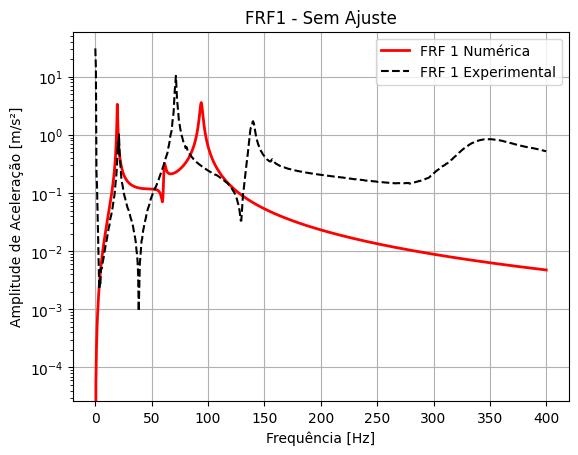

In [716]:
import numpy as np
from scipy.linalg import eigh

N = 3

# Montando matrizes de massa e rigidez
K = K_matriz

M = M_matriz

# Extração dos autovalores e autovetores
W, V = eigh(K, M)
W = np.real(W)  # Para obter apenas os componentes reais dos autovalores

# Freq. Naturais e
wi = np.sqrt(W)
fi = wi / (2 * np.pi)

# Funcoes Resposta em Frequencia
f = freq
w = 2 * np.pi * f
x = 0  # Considerando índices baseados em zero
xf = 1  # Considerando índices baseados em zero

# Funcoes Resposta em Frequencia - Com amortecimento
qsi = qsi_medio
Hm = np.zeros((len(w), N), dtype=complex)
H = np.zeros(len(w), dtype=complex) 

for j in range(len(w)):
    soma1 = 0
    for k in range(N):
        soma1 += - (w[j]**2)*(V[x, k] * V[xf, k] / (wi[k]**2 - w[j]**2 + 1j * 2 * qsi * wi[k] * w[j]))
        Hm[j, k] = - (w[j]**2)*(V[x, k] * V[xf, k] / (wi[k]**2 - w[j]**2 + 1j * 2 * qsi * wi[k] * w[j]))
    H[j] = soma1

# Y = 1j * w * H

# Plotting absolute value of H
plt.plot(freq, np.abs(H), 'r', linewidth=2, label='FRF 1 Numérica')

frf_1_andar = np.abs(df['Signal 2 (Imag.)']) + np.abs(df['Signal 2 (Real)']) # Obtém-se o módulo da FRF

plt.plot(freq, frf_1_andar, 'black', label='FRF 1 Experimental', ls='--')

plt.xlabel('Frequência [Hz]')
plt.ylabel('Amplitude de Aceleração [m/s²]')
plt.grid()
plt.yscale('log')
plt.legend()
plt.title('FRF1 - Sem Ajuste')
#plt.savefig("D:\\UFSC\\Vibes\\Cordioli\\Trabalho\\Grupo 6\\FRF1_numerica_sem_ajuste_viga_livre.png")
#plt.savefig("D:\\UFSC\\Vibes\\Cordioli\\Trabalho\\Grupo 6\\FRF1_numerica_sem_ajuste_viga_guiada.png")
plt.show()

## FRF 2 Numérica

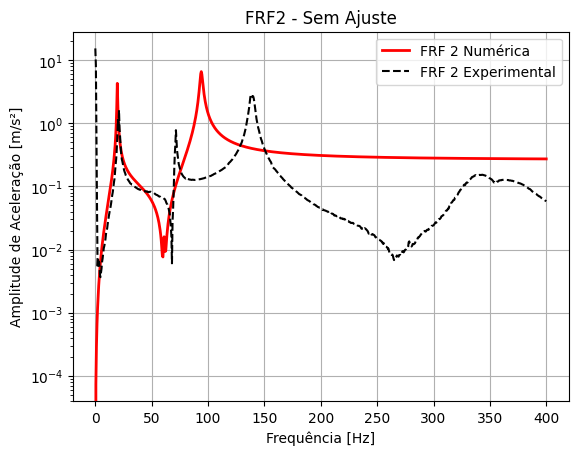

In [717]:
import numpy as np
from scipy.linalg import eigh

N = 3

# Montando matrizes de massa e rigidez
K = K_matriz

M = M_matriz

# Extração dos autovalores e autovetores
W, V = eigh(K, M)
W = np.real(W)  # Para obter apenas os componentes reais dos autovalores

# Freq. Naturais e
wi = np.sqrt(W)
fi = wi / (2 * np.pi)

# Funcoes Resposta em Frequencia
f = freq
w = 2 * np.pi * f
x = 1  # Considerando índices baseados em zero
xf = 1  # Considerando índices baseados em zero

# Funcoes Resposta em Frequencia - Com amortecimento
qsi = qsi_medio
Hm = np.zeros((len(w), N), dtype=complex)
H = np.zeros(len(w), dtype=complex)

for j in range(len(w)):
    soma1 = 0
    for k in range(N):
        soma1 += - (w[j]**2)*(V[x, k] * V[xf, k] / (wi[k]**2 - w[j]**2 + 1j * 2 * qsi * wi[k] * w[j]))
        Hm[j, k] = - (w[j]**2)*(V[x, k] * V[xf, k] / (wi[k]**2 - w[j]**2 + 1j * 2 * qsi * wi[k] * w[j]))
    H[j] = soma1

# Y = 1j * w * H

# Plotting absolute value of H
plt.plot(freq, np.abs(H), 'r', linewidth=2, label='FRF 2 Numérica')

frf_2_andar = np.abs(df['Signal 3 (Imag.)']) + np.abs(df['Signal 3 (Real)']) # Obtém-se o módulo da FRF

plt.plot(freq, frf_2_andar, 'black', label='FRF 2 Experimental', ls='--')

plt.xlabel('Frequência [Hz]')
plt.ylabel('Amplitude de Aceleração [m/s²]')
plt.grid()
plt.yscale('log')
plt.legend()
plt.title('FRF2 - Sem Ajuste')
#plt.savefig("D:\\UFSC\\Vibes\\Cordioli\\Trabalho\\Grupo 6\\FRF2_numerica_sem_ajuste_viga_livre.png")
#plt.savefig("D:\\UFSC\\Vibes\\Cordioli\\Trabalho\\Grupo 6\\FRF2_numerica_sem_ajuste_viga_guiada.png")
plt.show()

## FRF 3 Numérica

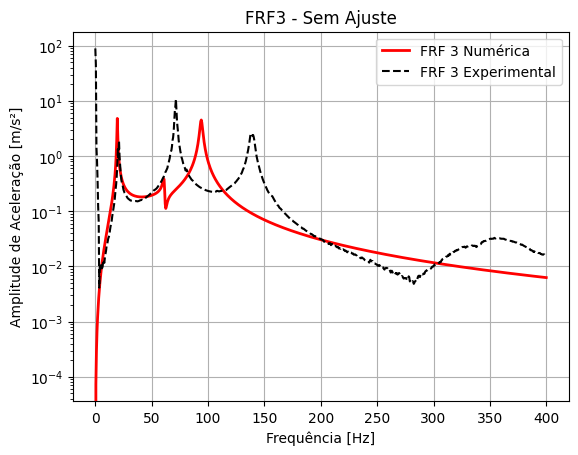

In [718]:
import numpy as np
from scipy.linalg import eigh

N = 3

# Montando matrizes de massa e rigidez
K = K_matriz

M = M_matriz

# Extração dos autovalores e autovetores
W, V = eigh(K, M)
W = np.real(W)  # Para obter apenas os componentes reais dos autovalores

# Freq. Naturais e
wi = np.sqrt(W)
fi = wi / (2 * np.pi)

# Funcoes Resposta em Frequencia
f = freq
w = 2 * np.pi * f
x = 2  # Considerando índices baseados em zero
xf = 1  # Considerando índices baseados em zero

# Funcoes Resposta em Frequencia - Com amortecimento
qsi = qsi_medio
Hm = np.zeros((len(w), N), dtype=complex)
H = np.zeros(len(w), dtype=complex)

for j in range(len(w)):
    soma1 = 0
    for k in range(N):
        soma1 += - (w[j]**2)*(V[x, k] * V[xf, k] / (wi[k]**2 - w[j]**2 + 1j * 2 * qsi * wi[k] * w[j]))
        Hm[j, k] = - (w[j]**2)*(V[x, k] * V[xf, k] / (wi[k]**2 - w[j]**2 + 1j * 2 * qsi * wi[k] * w[j]))
    H[j] = soma1

# Y = 1j * w * H

# Plotting absolute value of H
plt.plot(freq, np.abs(H), 'r', linewidth=2, label='FRF 3 Numérica')

frf_3_andar = np.abs(df['Signal 4 (Imag.)']) + np.abs(df['Signal 4 (Real)']) # Obtém-se o módulo da FRF

plt.plot(freq, frf_3_andar, 'black', label='FRF 3 Experimental', ls='--')

plt.xlabel('Frequência [Hz]')
plt.ylabel('Amplitude de Aceleração [m/s²]')
plt.grid()
plt.yscale('log')
plt.legend()
plt.title('FRF3 - Sem Ajuste')
#plt.savefig("D:\\UFSC\\Vibes\\Cordioli\\Trabalho\\Grupo 6\\FRF3_numerica_sem_ajuste_viga_livre.png")
#plt.savefig("D:\\UFSC\\Vibes\\Cordioli\\Trabalho\\Grupo 6\\FRF3_numerica_sem_ajuste_viga_guiada.png")
plt.show()

# Otimização do código

In [719]:
from scipy import optimize
import numpy as np
from scipy.linalg import eigh

In [720]:
wn_1 = [21.0, 71.5, 140.0]
wn_2 = [21.0, 71.5, 138.5]
wn_3 = [21.0, 71.5, 138.5]

wd_medio = []

print(q_si_1)
print(q_si_2)
print(q_si_3)

q_si_medio = []

for i in range(0, 3):
    valor = 0
    valor = (q_si_1[i] + q_si_2[i] + q_si_3[i])/3
    q_si_medio.append(valor)

print(f'Qsi médio {q_si_medio}')

for i in range(0, 3):
    valor = 0
    valor = (wn_1[i] + wn_2[i] + wn_3[i])/3
    valor = valor * 2 * np.pi
    wd_medio.append(valor)

print(wd_medio)

wn = []

for i in range(0, 3):
    valor = 0
    valor = wd_medio[i]/(np.sqrt(1 - q_si_medio[i]**2))
    wn.append(valor)

print(f'Frequência natural: {wn}')



[0.013699539307117047, 0.0069543264333743905, 0.014735563149414927]
[0.013867758925223432, 0.005897369883841241, 0.01613175957649553]
[0.01394205723340511, 0.007215744525613047, 0.01624102971686024]
Qsi médio [0.013836451821915195, 0.006689146947609559, 0.015702784147590233]
[131.94689145077132, 449.2477494633404, 873.3627576979625]
Frequência natural: [131.95952370919855, 449.2578005255826, 873.4704533869857]


In [721]:
#dados do material: Aço 1020

E = 205e9 #módulo de elasticidade e, Pa
rho = 7870 #densidade em kg/m³

#propriedades dos andares--------------------------------------------------------------------------

a = 0.00965 #espessura do andar em m
b = 0.226 #comprimento do andar em m
c = .15180 #largura do andar em m

volume_andar=a*b*c #volume do andar
massa_andar = volume_andar*rho
m_andar = np.array([massa_andar,massa_andar,massa_andar])
print("massa de cada andar = ",round(massa_andar,3),"kg")

#massas adicionadas no experimento ----------------------------------------------------------------------------------

m1 = 1.635 #massa adicionada ao primeiro andar em kg
m2 = 1.187 #massa adicionada ao segundo andar em kg
m3 = 0 #massa adicionada ao terceiro andar em kg
m_adicionada = np.array([m1,m2,m3])

#propridedes da viga ----------------------------------------------------------------------------------------------------------------

#comprimentos
viga1 = 0.12
viga2 = 0.0903
viga3 = 0.0967
L = np.array([viga1,viga2,viga3]) #comprimentos das vigas em metros(Primeiro andar, Segundo andar, Terceiro andar)
print("[Viga1 Viga2 Viga3] = ",L)

#perfil da viga

h = 0.0032 #espessura das vigas no sentido do carregamento
e = 0.04966 #largura das vigas
A_st = h*e #area da seção transversal da viga
I = (e*(h**3))/12 #momento de inércia das vigas em m^4
#print("I =",I)

#massa das vigas

m_viga = np.array([0.0,0,0])

for i in range(len(L)):
  m_viga[i] = 4*((A_st*L[i])*rho)
m_viga[0] = 0
print("m_viga =",m_viga)

#massa final de cada andar ------------------------------------------------------------------------------------------------------

m_total = m_andar + m_adicionada # Essa é com a massa de cada andar 
print("massa total em cada andar =",m_total)

M_matriz = np.zeros([3,3])

m1 = m_total[0]
m2 = m_total[1]
m3 = m_total[2]

M_matriz[0][0] = m1
M_matriz[1][1] = m2
M_matriz[2][2] = m3
print(M_matriz)

massa de cada andar =  2.605 kg
[Viga1 Viga2 Viga3] =  [0.12   0.0903 0.0967]
m_viga = [0.         0.45173024 0.48374656]
massa total em cada andar = [4.24044708 3.79244708 2.60544708]
[[4.24044708 0.         0.        ]
 [0.         3.79244708 0.        ]
 [0.         0.         2.60544708]]


## Primeiro Andar

[3.13986685 8.79557668 3.4042833 ]
[131.95952371 449.25780053 873.47045339]


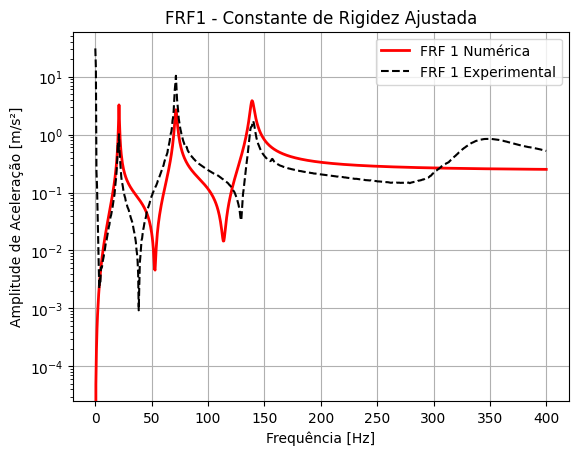

In [722]:
def ajusteK(a1, a2, a3):
    a = np.array([a1, a2, a3])
    k1 = 4*a[0]*E*I/(L[0]**3)
    k2 = 4*a[1]*E*I/(L[1]**3)
    k3 = 4*a[2]*E*I/(L[2]**3)
    K = np.asarray([[k1 + k2, -k2,   0],
                    [-k2, k2 + k3, -k3],
                    [0,   -k3,      k3]])
    aut_val, aut_vet = eigh(K, M_matriz)
    return np.sqrt(aut_val)

def costFun(x):
    return ajusteK(x[0], x[1], x[2]) - wn

# Cálculo dos coeficientes ajustados
a_ajustado = optimize.least_squares(costFun, [35, 35, 35], bounds=([3, 3, 3], [100, 100, 100]), method='trf')
a = a_ajustado["x"]  # Valores dos coeficientes otimizados armazenados
print(a)

k1_ajustado = 4*a[0]*E*I/(L[0]**3)
k2_ajustado = 4*a[1]*E*I/(L[1]**3)
k3_ajustado = 4*a[2]*E*I/(L[2]**3)

K_ajustado = np.asarray([[k1_ajustado + k2_ajustado, -k2_ajustado,   0], [k2_ajustado, k2_ajustado + k3_ajustado, -k3_ajustado], [0,   -k3_ajustado,      k3_ajustado]])


N = 3

# Montando matrizes de massa e rigidez
K = K_ajustado

M = M_matriz

# Extração dos autovalores e autovetores
W, V = eigh(K, M)
W = np.real(W)  # Para obter apenas os componentes reais dos autovalores

# Freq. Naturais e
wi = np.sqrt(W)
print(wi)
fi = wi / (2 * np.pi)

# Funcoes Resposta em Frequencia
f = freq
w = 2 * np.pi * f
x = 0  # Considerando índices baseados em zero
xf = 0  # Considerando índices baseados em zero

# Funcoes Resposta em Frequencia - Com amortecimento
# print(qsi_medio)
qsi = qsi_medio
Hm = np.zeros((len(w), N), dtype=complex)
H_1 = np.zeros(len(w), dtype=complex)

for j in range(len(w)):
    soma1 = 0
    for k in range(N):
        soma1 += - (w[j]**2)*(V[x, k] * V[xf, k] / (wi[k]**2 - w[j]**2 + 1j * 2 * qsi * wi[k] * w[j]))
        Hm[j, k] = - (w[j]**2)*(V[x, k] * V[xf, k] / (wi[k]**2 - w[j]**2 + 1j * 2 * qsi * wi[k] * w[j]))
    H_1[j] = soma1

# Y = 1j * w * H

# Plotting absolute value of H
plt.plot(freq, np.abs(H_1), 'r', linewidth=2, label='FRF 1 Numérica')

frf_1_andar = np.abs(df['Signal 2 (Imag.)']) + np.abs(df['Signal 2 (Real)']) # Obtém-se o módulo da FRF

plt.plot(freq, frf_1_andar, 'black', label='FRF 1 Experimental', ls='--')

plt.xlabel('Frequência [Hz]')
plt.ylabel('Amplitude de Aceleração [m/s²]')
plt.grid()
plt.yscale('log')
plt.legend()
plt.title('FRF1 - Constante de Rigidez Ajustada')
#plt.savefig("D:\\UFSC\\Vibes\\Cordioli\\Trabalho\\Grupo 6\\FRF1_numerica_ajustada.png")
plt.show()

## Segundo Andar

[3.13986685 8.79557668 3.4042833 ]
[131.95952371 449.25780053 873.47045339]


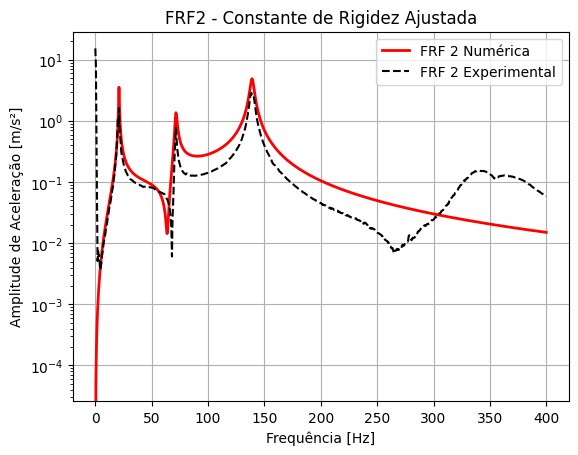

In [723]:
def ajusteK(a1, a2, a3):
    a = np.array([a1, a2, a3])
    k1 = 4*a[0]*E*I/(L[0]**3)
    k2 = 4*a[1]*E*I/(L[1]**3)
    k3 = 4*a[2]*E*I/(L[2]**3)
    K = np.asarray([[k1 + k2, -k2,   0],
                    [-k2, k2 + k3, -k3],
                    [0,   -k3,      k3]])
    aut_val, aut_vet = eigh(K, M_matriz)
    return np.sqrt(aut_val)

def costFun(x):
    return ajusteK(x[0], x[1], x[2]) - wn

# Cálculo dos coeficientes ajustados
a_ajustado = optimize.least_squares(costFun, [35, 35, 35], bounds=([3, 3, 3], [100, 100, 100]), method='trf')
a = a_ajustado["x"]  # Valores dos coeficientes otimizados armazenados
print(a)

k1_ajustado = 4*a[0]*E*I/(L[0]**3)
k2_ajustado = 4*a[1]*E*I/(L[1]**3)
k3_ajustado = 4*a[2]*E*I/(L[2]**3)

K_ajustado = np.asarray([[k1_ajustado + k2_ajustado, -k2_ajustado,   0], [k2_ajustado, k2_ajustado + k3_ajustado, -k3_ajustado], [0,   -k3_ajustado,      k3_ajustado]])


N = 3

# Montando matrizes de massa e rigidez
K = K_ajustado

M = M_matriz

# Extração dos autovalores e autovetores
W, V = eigh(K, M)
W = np.real(W)  # Para obter apenas os componentes reais dos autovalores

# Freq. Naturais e
wi = np.sqrt(W)
print(wi)
fi = wi / (2 * np.pi)

# Funcoes Resposta em Frequencia
f = freq
w = 2 * np.pi * f
x = 1  # Considerando índices baseados em zero
xf = 0  # Considerando índices baseados em zero

# Funcoes Resposta em Frequencia - Com amortecimento
# print(qsi_medio)
qsi = qsi_medio
Hm = np.zeros((len(w), N), dtype=complex)
H_2 = np.zeros(len(w), dtype=complex)

for j in range(len(w)):
    soma1 = 0
    for k in range(N):
        soma1 += - (w[j]**2)*(V[x, k] * V[xf, k] / (wi[k]**2 - w[j]**2 + 1j * 2 * qsi * wi[k] * w[j]))
        Hm[j, k] = - (w[j]**2)*(V[x, k] * V[xf, k] / (wi[k]**2 - w[j]**2 + 1j * 2 * qsi * wi[k] * w[j]))
    H_2[j] = soma1

# Y = 1j * w * H

# Plotting absolute value of H
plt.plot(freq, np.abs(H_2), 'r', linewidth=2, label='FRF 2 Numérica')

frf_2_andar = np.abs(df['Signal 3 (Imag.)']) + np.abs(df['Signal 3 (Real)']) # Obtém-se o módulo da FRF

plt.plot(freq, frf_2_andar, 'black', label='FRF 2 Experimental', ls='--')

plt.xlabel('Frequência [Hz]')
plt.ylabel('Amplitude de Aceleração [m/s²]')
plt.grid()
plt.yscale('log')
plt.legend()
plt.title('FRF2 - Constante de Rigidez Ajustada')
#plt.savefig("D:\\UFSC\\Vibes\\Cordioli\\Trabalho\\Grupo 6\\FRF2_numerica_ajustada.png")
plt.show()

## Terceiro Andar

[3.13986685 8.79557668 3.4042833 ]
[131.95952371 449.25780053 873.47045339]


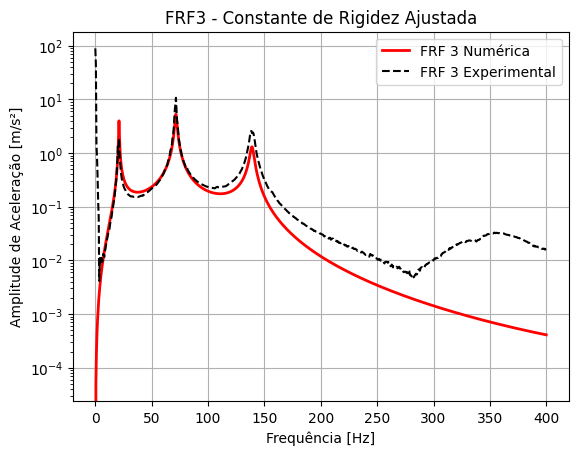

In [724]:
def ajusteK(a1, a2, a3):
    a = np.array([a1, a2, a3])
    k1 = 4*a[0]*E*I/(L[0]**3)
    k2 = 4*a[1]*E*I/(L[1]**3)
    k3 = 4*a[2]*E*I/(L[2]**3)
    K = np.asarray([[k1 + k2, -k2,   0],
                    [-k2, k2 + k3, -k3],
                    [0,   -k3,      k3]])
    aut_val, aut_vet = eigh(K, M_matriz)
    return np.sqrt(aut_val)

def costFun(x):
    return ajusteK(x[0], x[1], x[2]) - wn

# Cálculo dos coeficientes ajustados
a_ajustado = optimize.least_squares(costFun, [35, 35, 35], bounds=([3, 3, 3], [100, 100, 100]), method='trf')
a = a_ajustado["x"]  # Valores dos coeficientes otimizados armazenados
print(a)

k1_ajustado = 4*a[0]*E*I/(L[0]**3)
k2_ajustado = 4*a[1]*E*I/(L[1]**3)
k3_ajustado = 4*a[2]*E*I/(L[2]**3)

K_ajustado = np.asarray([[k1_ajustado + k2_ajustado, -k2_ajustado,   0], [k2_ajustado, k2_ajustado + k3_ajustado, -k3_ajustado], [0,   -k3_ajustado,      k3_ajustado]])


N = 3

# Montando matrizes de massa e rigidez
K = K_ajustado

M = M_matriz

# Extração dos autovalores e autovetores
W, V = eigh(K, M)
W = np.real(W)  # Para obter apenas os componentes reais dos autovalores

# Freq. Naturais e
wi = np.sqrt(W)
print(wi)
fi = wi / (2 * np.pi)

# Funcoes Resposta em Frequencia
f = freq
w = 2 * np.pi * f
x = 2  # Considerando índices baseados em zero
xf = 0  # Considerando índices baseados em zero

# Funcoes Resposta em Frequencia - Com amortecimento
# print(qsi_medio)
qsi = qsi_medio
Hm = np.zeros((len(w), N), dtype=complex)
H_3 = np.zeros(len(w), dtype=complex)

for j in range(len(w)):
    soma1 = 0
    for k in range(N):
        soma1 += - (w[j]**2)*(V[x, k] * V[xf, k] / (wi[k]**2 - w[j]**2 + 1j * 2 * qsi * wi[k] * w[j]))
        Hm[j, k] = - (w[j]**2)*(V[x, k] * V[xf, k] / (wi[k]**2 - w[j]**2 + 1j * 2 * qsi * wi[k] * w[j]))
    H_3[j] = soma1

# Y = 1j * w * H

# Plotting absolute value of H
plt.plot(freq, np.abs(H_3), 'r', linewidth=2, label='FRF 3 Numérica')

frf_3_andar = np.abs(df['Signal 4 (Imag.)']) + np.abs(df['Signal 4 (Real)']) # Obtém-se o módulo da FRF

plt.plot(freq, frf_3_andar, 'black', label='FRF 3 Experimental', ls='--')

plt.xlabel('Frequência [Hz]')
plt.ylabel('Amplitude de Aceleração [m/s²]')
plt.grid()
plt.yscale('log')
plt.legend()
plt.title('FRF3 - Constante de Rigidez Ajustada')
#plt.savefig("D:\\UFSC\\Vibes\\Cordioli\\Trabalho\\Grupo 6\\FRF3_numerica_ajustada.png")
plt.show()

## Fomas Modais

In [725]:
# Pegar o auto_vetor
print(V)

form_modal = np.insert(V, 0, np.zeros([1,3]), axis = 0)
print(form_modal)

graf_x = [0, 1, 2, 3]

[[-0.28015658 -0.25434786 -0.30437419]
 [ 0.30719793  0.12915193 -0.39068044]
 [ 0.34453705 -0.50422436  0.10422718]]
[[ 0.          0.          0.        ]
 [-0.28015658 -0.25434786 -0.30437419]
 [ 0.30719793  0.12915193 -0.39068044]
 [ 0.34453705 -0.50422436  0.10422718]]


### Primeiro Modo

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


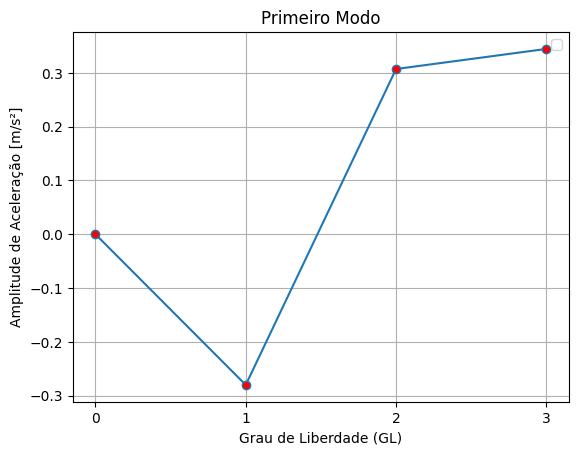

In [726]:
plt.plot(graf_x, form_modal[:, 0], marker='o', mfc = 'r')

plt.xlabel('Grau de Liberdade (GL)')
plt.ylabel('Amplitude de Aceleração [m/s²]')
plt.xticks(graf_x)
plt.grid()
plt.legend()
plt.title('Primeiro Modo')
#plt.savefig("D:\\UFSC\\Vibes\\Cordioli\\Trabalho\\Grupo 6\\Primeiro_Modo.png")
plt.show()

### Segundo Modo

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


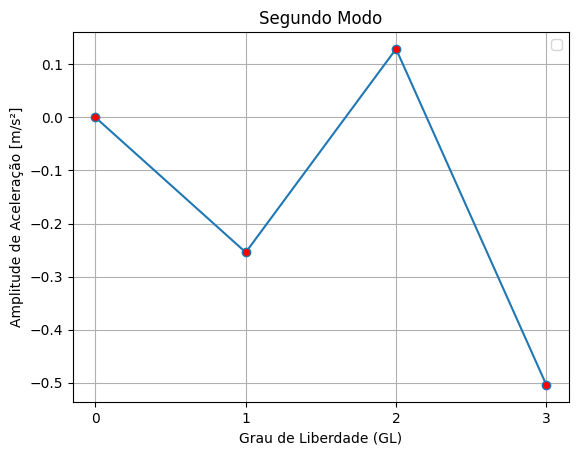

In [727]:
plt.plot(graf_x, form_modal[:, 1], marker='o', mfc = 'r')

plt.xlabel('Grau de Liberdade (GL)')
plt.ylabel('Amplitude de Aceleração [m/s²]')
plt.xticks(graf_x)
plt.grid()
plt.legend()
plt.title('Segundo Modo')
#plt.savefig("D:\\UFSC\\Vibes\\Cordioli\\Trabalho\\Grupo 6\\Segundo_Modo.png")
plt.show()

### Terceiro Modo

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


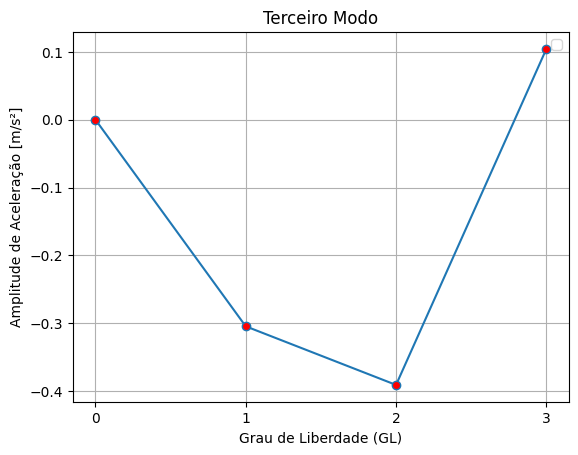

In [728]:
plt.plot(graf_x, form_modal[:, 2], marker='o', mfc = 'r')

plt.xlabel('Grau de Liberdade (GL)')
plt.ylabel('Amplitude de Aceleração [m/s²]')
plt.xticks(graf_x)
plt.grid()
plt.legend()
plt.title('Terceiro Modo')
#plt.savefig("D:\\UFSC\\Vibes\\Cordioli\\Trabalho\\Grupo 6\\Terceiro_Modo.png")
plt.show()

# Parte 2 do Trabalho

In [729]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [730]:
df = pd.read_excel("D:\\UFSC\\Vibes\\Cordioli\\Trabalho\\Grupo 6\\Passa-banda_easy_to_import.xlsx")

In [731]:
df.shape

(801, 5)

In [732]:
df.columns

Index(['Frequencia', 'Signal 1 (N)^2', 'Signal 2 (m/s^2)^2',
       'Signal 3 (m/s^2)^2', 'Signal 4 (m/s^2)^2'],
      dtype='object')

In [733]:
df.head()

,Frequencia,Signal 1 (N)^2,Signal 2 (m/s^2)^2,Signal 3 (m/s^2)^2,Signal 4 (m/s^2)^2
0,0.0,3.748040e-07,7.229974e-06,1.231132e-05,0.000328
1,0.5,3.189841e-06,4.337759e-06,9.756293e-06,0.000233
2,1.0,9.414926e-06,1.345851e-07,3.745251e-07,0.000030
3,1.5,2.603968e-06,8.996979e-08,7.002031e-08,0.000013
4,2.0,1.394324e-07,5.087998e-08,4.585662e-08,0.000010


## Importando o sinal de Força

In [734]:
sinal_forca = np.sqrt(df['Signal 1 (N)^2'])

In [735]:
print(sinal_forca.shape)
print(sinal_forca.head())

(801,)
0    0.000612
1    0.001786
2    0.003068
3    0.001614
4    0.000373
Name: Signal 1 (N)^2, dtype: float64


### Primeiro Andar

In [736]:
sinal_2 = np.sqrt(df['Signal 2 (m/s^2)^2'])

In [737]:
X_tio_1 = np.abs(sinal_forca)*np.abs(H_1)

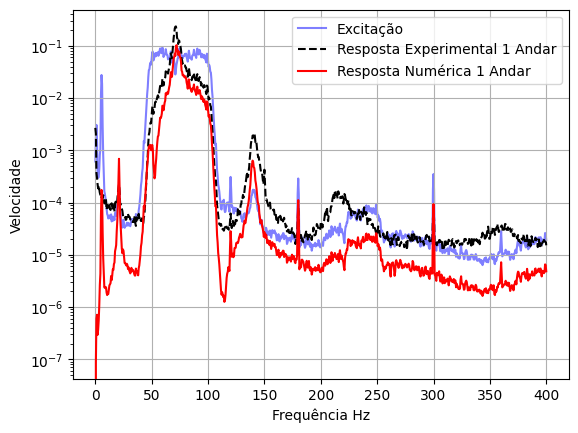

In [738]:
plt.plot(freq, np.abs(sinal_forca), 'b', label='Excitação', zorder = 0, alpha=.5)
plt.plot(freq, sinal_2, 'black', label='Resposta Experimental 1 Andar', ls='--', zorder = 5)
plt.plot(freq, X_tio_1, 'r', label= 'Resposta Numérica 1 Andar', zorder = 10)

plt.xlabel('Frequência Hz')
plt.ylabel('Velocidade')
plt.grid()
plt.legend()
plt.yscale('log')
#plt.title()
#plt.savefig("D:\\UFSC\\Vibes\\Cordioli\\Trabalho\\Grupo 6\\Magnitude_velocidade_passa_banda_1.png")
plt.show()


### Segundo Andar

In [739]:
sinal_3 = np.sqrt(df['Signal 3 (m/s^2)^2'])

In [740]:
X_tio_2 = np.abs(sinal_forca)*np.abs(H_2)

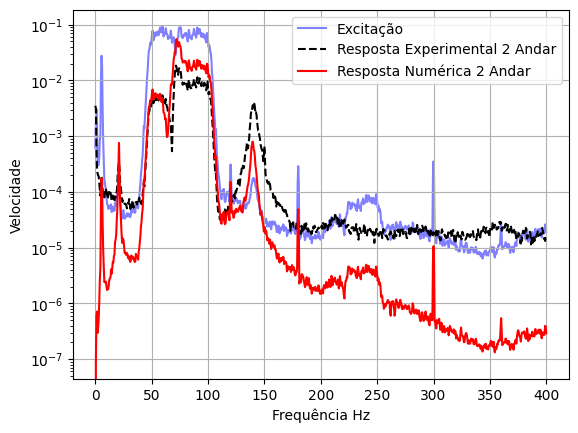

In [741]:
plt.plot(freq, np.abs(sinal_forca), 'b', label='Excitação', zorder = 0, alpha=.5)
plt.plot(freq, sinal_3, 'black', label='Resposta Experimental 2 Andar', ls='--', zorder = 5)
plt.plot(freq, X_tio_2, 'r', label= 'Resposta Numérica 2 Andar', zorder = 10)

plt.xlabel('Frequência Hz')
plt.ylabel('Velocidade')
plt.grid()
plt.legend()
plt.yscale('log')
#plt.title()
#plt.savefig("D:\\UFSC\\Vibes\\Cordioli\\Trabalho\\Grupo 6\\Magnitude_velocidade_passa_banda_2.png")
plt.show()


### Terceiro Andar

In [742]:
sinal_4 = np.sqrt(df['Signal 4 (m/s^2)^2'])

In [743]:
X_tio_3 = np.abs(sinal_forca)*np.abs(H_3)

In [744]:
X_tio_3_pas = X_tio_3[:]

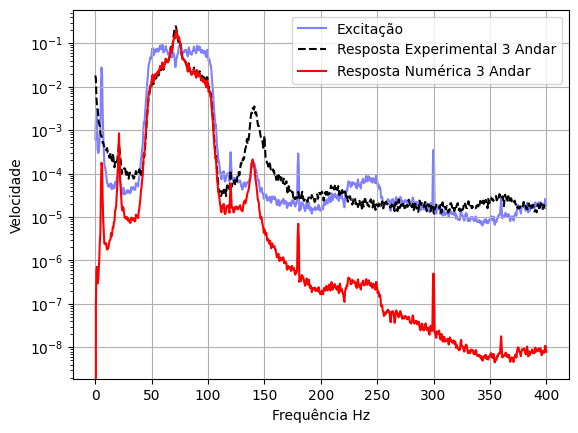

In [745]:
plt.plot(freq, np.abs(sinal_forca), 'b', label='Excitação', zorder = 0, alpha=.5)
plt.plot(freq, sinal_4, 'black', label='Resposta Experimental 3 Andar', ls='--', zorder = 5)
plt.plot(freq, X_tio_3, 'r', label= 'Resposta Numérica 3 Andar', zorder = 10)

plt.xlabel('Frequência Hz')
plt.ylabel('Velocidade')
plt.grid()
plt.legend()
plt.yscale('log')
#plt.title()
#plt.savefig("D:\\UFSC\\Vibes\\Cordioli\\Trabalho\\Grupo 6\\Magnitude_velocidade_passa_banda_3.png")
plt.show()


## Valor RMS

### Valor RMS - Primeiro Andar

In [746]:
X1_rms = 0
for i in range(0, len(X_tio_1)):
    X1_rms = X1_rms + X_tio_1[i]

print(X1_rms)

2.1887986941335438


### Valor RMS - Segundo Andar

In [747]:
X2_rms = 0
for i in range(0, len(X_tio_2)):
    X2_rms = X2_rms + X_tio_2[i]

print(X2_rms)

1.7761834201743005


### Valor RMS - Terceiro Andar

In [748]:
X3_rms = 0
for i in range(0, len(X_tio_3)):
    X3_rms = X3_rms + X_tio_3[i]

print(X3_rms)

4.530559094945609


### RMS Global em dB

Usaremos como referência o segundo Andar

#### RMS Global em dB - Primeiro Andar

In [749]:
NV1 = 20 * np.log10(X1_rms/X3_rms)

print(NV1)

-6.318919572419736


#### RMS Global em dB - Segundo Andar

In [750]:
NV2 = 20 * np.log10(X2_rms/X3_rms)

print(NV2)

-8.133279754860643


## Proposta de Solução para o Terceiro Andar

In [751]:
#dados do material: Aço 1020

E = 205e9 #módulo de elasticidade e, Pa
rho = 7870 #densidade em kg/m³

#propriedades dos andares--------------------------------------------------------------------------

a = 0.00965 #espessura do andar em m
b = 0.226 #comprimento do andar em m
c = .15180 #largura do andar em m

volume_andar=a*b*c #volume do andar
massa_andar = volume_andar*rho
m_andar = np.array([massa_andar,massa_andar,massa_andar])
print("massa de cada andar = ",round(massa_andar,3),"kg")

#massas adicionadas no experimento ----------------------------------------------------------------------------------

m1 = 1.635 #massa adicionada ao primeiro andar em kg
m2 = 1.187 #massa adicionada ao segundo andar em kg
m3 = 0 #massa adicionada ao terceiro andar em kg
m_adicionada = np.array([m1,m2,m3])

#propridedes da viga ----------------------------------------------------------------------------------------------------------------

#comprimentos
viga1 = 0.12
viga2 = 0.0903
viga3 = 0.0967
L = np.array([viga1,viga2,viga3]) #comprimentos das vigas em metros(Primeiro andar, Segundo andar, Terceiro andar)
print("[Viga1 Viga2 Viga3] = ",L)

#perfil da viga

h = 0.0032 #espessura das vigas no sentido do carregamento
e = 0.04966 #largura das vigas
A_st = h*e #area da seção transversal da viga
I = (e*(h**3))/12 #momento de inércia das vigas em m^4
#print("I =",I)

#massa das vigas

m_viga = np.array([0.0,0,0])

for i in range(len(L)):
  m_viga[i] = 4*((A_st*L[i])*rho)
m_viga[0] = 0
print("m_viga =",m_viga)

#massa final de cada andar ------------------------------------------------------------------------------------------------------

m_total = m_andar + m_adicionada # Essa é com a massa de cada andar 
print("massa total em cada andar =",m_total)

M_matriz = np.zeros([3,3])

m1 = m_total[0]
m2 = m_total[1]
m3 = m_total[2]

M_matriz[0][0] = m1
M_matriz[1][1] = m2
M_matriz[2][2] = m3
print(M_matriz)

massa de cada andar =  2.605 kg
[Viga1 Viga2 Viga3] =  [0.12   0.0903 0.0967]
m_viga = [0.         0.45173024 0.48374656]
massa total em cada andar = [4.24044708 3.79244708 2.60544708]
[[4.24044708 0.         0.        ]
 [0.         3.79244708 0.        ]
 [0.         0.         2.60544708]]


Uma nova matriz de Massa com o aumento de 1 kg no Terceiro andar.

In [752]:
M_matriz_nova = np.zeros([3,3])

m1 = m_total[0]
m2 = m_total[1]
m3 = m_total[2]

M_matriz_nova[0][0] = m1
M_matriz_nova[1][1] = m2
M_matriz_nova[2][2] = m3 + 1
print(M_matriz_nova)

[[4.24044708 0.         0.        ]
 [0.         3.79244708 0.        ]
 [0.         0.         3.60544708]]


In [753]:
df = pd.read_excel("D:\\UFSC\\Vibes\\Cordioli\\Trabalho\\Grupo 6\\FRF_easy_to_import.xlsx")

### Nova FRF do Primeiro Andar

[3.13986685 8.79557668 3.4042833 ]
[124.6175102  405.90063037 870.25665777]


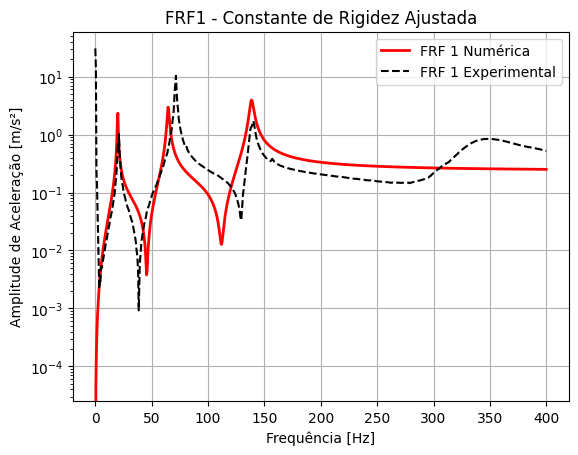

In [754]:
def ajusteK(a1, a2, a3):
    a = np.array([a1, a2, a3])
    k1 = 4*a[0]*E*I/(L[0]**3)
    k2 = 4*a[1]*E*I/(L[1]**3)
    k3 = 4*a[2]*E*I/(L[2]**3)
    K = np.asarray([[k1 + k2, -k2,   0],
                    [-k2, k2 + k3, -k3],
                    [0,   -k3,      k3]])
    aut_val, aut_vet = eigh(K, M_matriz)
    return np.sqrt(aut_val)

def costFun(x):
    return ajusteK(x[0], x[1], x[2]) - wn

# Cálculo dos coeficientes ajustados
a_ajustado = optimize.least_squares(costFun, [35, 35, 35], bounds=([3, 3, 3], [100, 100, 100]), method='trf')
a = a_ajustado["x"]  # Valores dos coeficientes otimizados armazenados
print(a)

k1_ajustado = 4*a[0]*E*I/(L[0]**3)
k2_ajustado = 4*a[1]*E*I/(L[1]**3)
k3_ajustado = 4*a[2]*E*I/(L[2]**3)

K_ajustado = np.asarray([[k1_ajustado + k2_ajustado, -k2_ajustado,   0], [k2_ajustado, k2_ajustado + k3_ajustado, -k3_ajustado], [0,   -k3_ajustado,      k3_ajustado]])


N = 3

# Montando matrizes de massa e rigidez
K = K_ajustado

M = M_matriz_nova

# Extração dos autovalores e autovetores
W, V = eigh(K, M)
W = np.real(W)  # Para obter apenas os componentes reais dos autovalores

# Freq. Naturais e
wi = np.sqrt(W)
print(wi)
fi = wi / (2 * np.pi)

# Funcoes Resposta em Frequencia
f = freq
w = 2 * np.pi * f
x = 0  # Considerando índices baseados em zero
xf = 0  # Considerando índices baseados em zero

# Funcoes Resposta em Frequencia - Com amortecimento
# print(qsi_medio)
qsi = qsi_medio
Hm = np.zeros((len(w), N), dtype=complex)
H_1 = np.zeros(len(w), dtype=complex)

for j in range(len(w)):
    soma1 = 0
    for k in range(N):
        soma1 += - (w[j]**2)*(V[x, k] * V[xf, k] / (wi[k]**2 - w[j]**2 + 1j * 2 * qsi * wi[k] * w[j]))
        Hm[j, k] = - (w[j]**2)*(V[x, k] * V[xf, k] / (wi[k]**2 - w[j]**2 + 1j * 2 * qsi * wi[k] * w[j]))
    H_1[j] = soma1

# Y = 1j * w * H

# Plotting absolute value of H
plt.plot(freq, np.abs(H_1), 'r', linewidth=2, label='FRF 1 Numérica')

frf_1_andar = np.abs(df['Signal 2 (Imag.)']) + np.abs(df['Signal 2 (Real)']) # Obtém-se o módulo da FRF

plt.plot(freq, frf_1_andar, 'black', label='FRF 1 Experimental', ls='--')

plt.xlabel('Frequência [Hz]')
plt.ylabel('Amplitude de Aceleração [m/s²]')
plt.grid()
plt.yscale('log')
plt.legend()
plt.title('FRF1 - Constante de Rigidez Ajustada')
#plt.savefig("D:\\UFSC\\Vibes\\Cordioli\\Trabalho\\Grupo 6\\FRF1_numerica_ajustada.png")
plt.show()

### Nova FRF do Segundo Andar

[3.13986685 8.79557668 3.4042833 ]
[124.6175102  405.90063037 870.25665777]


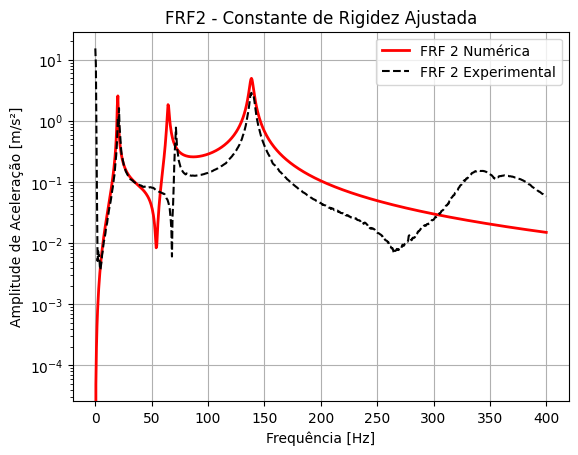

In [755]:
def ajusteK(a1, a2, a3):
    a = np.array([a1, a2, a3])
    k1 = 4*a[0]*E*I/(L[0]**3)
    k2 = 4*a[1]*E*I/(L[1]**3)
    k3 = 4*a[2]*E*I/(L[2]**3)
    K = np.asarray([[k1 + k2, -k2,   0],
                    [-k2, k2 + k3, -k3],
                    [0,   -k3,      k3]])
    aut_val, aut_vet = eigh(K, M_matriz)
    return np.sqrt(aut_val)

def costFun(x):
    return ajusteK(x[0], x[1], x[2]) - wn

# Cálculo dos coeficientes ajustados
a_ajustado = optimize.least_squares(costFun, [35, 35, 35], bounds=([3, 3, 3], [100, 100, 100]), method='trf')
a = a_ajustado["x"]  # Valores dos coeficientes otimizados armazenados
print(a)

k1_ajustado = 4*a[0]*E*I/(L[0]**3)
k2_ajustado = 4*a[1]*E*I/(L[1]**3)
k3_ajustado = 4*a[2]*E*I/(L[2]**3)

K_ajustado = np.asarray([[k1_ajustado + k2_ajustado, -k2_ajustado,   0], [k2_ajustado, k2_ajustado + k3_ajustado, -k3_ajustado], [0,   -k3_ajustado,      k3_ajustado]])


N = 3

# Montando matrizes de massa e rigidez
K = K_ajustado

M = M_matriz_nova

# Extração dos autovalores e autovetores
W, V = eigh(K, M)
W = np.real(W)  # Para obter apenas os componentes reais dos autovalores

# Freq. Naturais e
wi = np.sqrt(W)
print(wi)
fi = wi / (2 * np.pi)

# Funcoes Resposta em Frequencia
f = freq
w = 2 * np.pi * f
x = 1  # Considerando índices baseados em zero
xf = 0  # Considerando índices baseados em zero

# Funcoes Resposta em Frequencia - Com amortecimento
# print(qsi_medio)
qsi = qsi_medio
Hm = np.zeros((len(w), N), dtype=complex)
H_2 = np.zeros(len(w), dtype=complex)

for j in range(len(w)):
    soma1 = 0
    for k in range(N):
        soma1 += - (w[j]**2)*(V[x, k] * V[xf, k] / (wi[k]**2 - w[j]**2 + 1j * 2 * qsi * wi[k] * w[j]))
        Hm[j, k] = - (w[j]**2)*(V[x, k] * V[xf, k] / (wi[k]**2 - w[j]**2 + 1j * 2 * qsi * wi[k] * w[j]))
    H_2[j] = soma1

# Y = 1j * w * H

# Plotting absolute value of H
plt.plot(freq, np.abs(H_2), 'r', linewidth=2, label='FRF 2 Numérica')

frf_2_andar = np.abs(df['Signal 3 (Imag.)']) + np.abs(df['Signal 3 (Real)']) # Obtém-se o módulo da FRF

plt.plot(freq, frf_2_andar, 'black', label='FRF 2 Experimental', ls='--')

plt.xlabel('Frequência [Hz]')
plt.ylabel('Amplitude de Aceleração [m/s²]')
plt.grid()
plt.yscale('log')
plt.legend()
plt.title('FRF2 - Constante de Rigidez Ajustada')
#plt.savefig("D:\\UFSC\\Vibes\\Cordioli\\Trabalho\\Grupo 6\\FRF2_numerica_ajustada.png")
plt.show()

### Nova FRF do Terceiro Andar

[3.13986685 8.79557668 3.4042833 ]
[124.6175102  405.90063037 870.25665777]


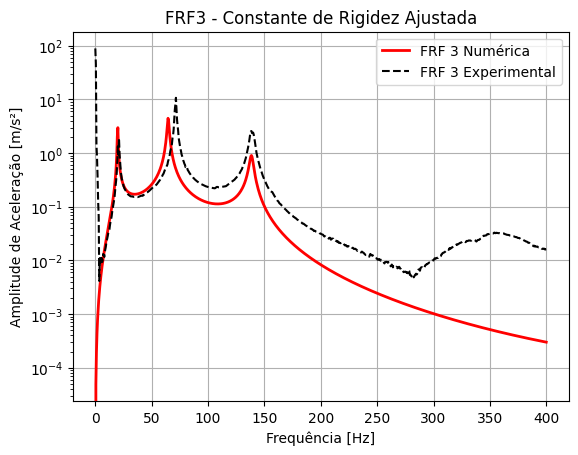

In [756]:
def ajusteK(a1, a2, a3):
    a = np.array([a1, a2, a3])
    k1 = 4*a[0]*E*I/(L[0]**3)
    k2 = 4*a[1]*E*I/(L[1]**3)
    k3 = 4*a[2]*E*I/(L[2]**3)
    K = np.asarray([[k1 + k2, -k2,   0],
                    [-k2, k2 + k3, -k3],
                    [0,   -k3,      k3]])
    aut_val, aut_vet = eigh(K, M_matriz)
    return np.sqrt(aut_val)

def costFun(x):
    return ajusteK(x[0], x[1], x[2]) - wn

# Cálculo dos coeficientes ajustados
a_ajustado = optimize.least_squares(costFun, [35, 35, 35], bounds=([3, 3, 3], [100, 100, 100]), method='trf')
a = a_ajustado["x"]  # Valores dos coeficientes otimizados armazenados
print(a)

k1_ajustado = 4*a[0]*E*I/(L[0]**3)
k2_ajustado = 4*a[1]*E*I/(L[1]**3)
k3_ajustado = 4*a[2]*E*I/(L[2]**3)

K_ajustado = np.asarray([[k1_ajustado + k2_ajustado, -k2_ajustado,   0], [k2_ajustado, k2_ajustado + k3_ajustado, -k3_ajustado], [0,   -k3_ajustado,      k3_ajustado]])


N = 3

# Montando matrizes de massa e rigidez
K = K_ajustado

M = M_matriz_nova

# Extração dos autovalores e autovetores
W, V = eigh(K, M)
W = np.real(W)  # Para obter apenas os componentes reais dos autovalores

# Freq. Naturais e
wi = np.sqrt(W)
print(wi)
fi = wi / (2 * np.pi)

# Funcoes Resposta em Frequencia
f = freq
w = 2 * np.pi * f
x = 2  # Considerando índices baseados em zero
xf = 0  # Considerando índices baseados em zero

# Funcoes Resposta em Frequencia - Com amortecimento
# print(qsi_medio)
qsi = qsi_medio
Hm = np.zeros((len(w), N), dtype=complex)
H_3 = np.zeros(len(w), dtype=complex)

for j in range(len(w)):
    soma1 = 0
    for k in range(N):
        soma1 += - (w[j]**2)*(V[x, k] * V[xf, k] / (wi[k]**2 - w[j]**2 + 1j * 2 * qsi * wi[k] * w[j]))
        Hm[j, k] = - (w[j]**2)*(V[x, k] * V[xf, k] / (wi[k]**2 - w[j]**2 + 1j * 2 * qsi * wi[k] * w[j]))
    H_3[j] = soma1

# Y = 1j * w * H

# Plotting absolute value of H
plt.plot(freq, np.abs(H_3), 'r', linewidth=2, label='FRF 3 Numérica')

frf_3_andar = np.abs(df['Signal 4 (Imag.)']) + np.abs(df['Signal 4 (Real)']) # Obtém-se o módulo da FRF

plt.plot(freq, frf_3_andar, 'black', label='FRF 3 Experimental', ls='--')

plt.xlabel('Frequência [Hz]')
plt.ylabel('Amplitude de Aceleração [m/s²]')
plt.grid()
plt.yscale('log')
plt.legend()
plt.title('FRF3 - Constante de Rigidez Ajustada')
#plt.savefig("D:\\UFSC\\Vibes\\Cordioli\\Trabalho\\Grupo 6\\FRF3_numerica_ajustada.png")
plt.show()

### Nova Magnitude da Velocidade no Primeiro Andar

In [757]:
df = pd.read_excel("D:\\UFSC\\Vibes\\Cordioli\\Trabalho\\Grupo 6\\Passa-banda_easy_to_import.xlsx")

In [758]:
X_tio_1 = np.abs(sinal_forca)*np.abs(H_1)

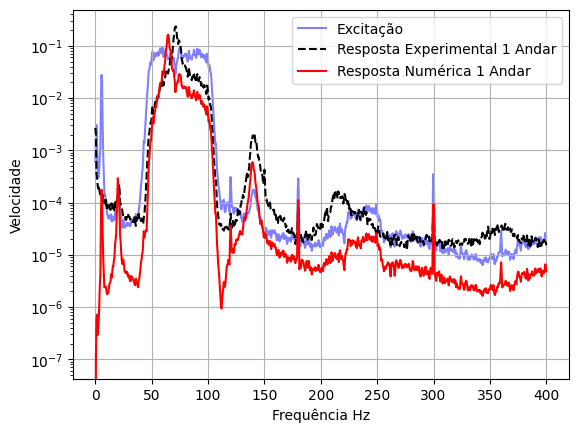

In [759]:
plt.plot(freq, np.abs(sinal_forca), 'b', label='Excitação', zorder = 0, alpha=.5)
plt.plot(freq, sinal_2, 'black', label='Resposta Experimental 1 Andar', ls='--', zorder = 5)
plt.plot(freq, X_tio_1, 'r', label= 'Resposta Numérica 1 Andar', zorder = 10)

plt.xlabel('Frequência Hz')
plt.ylabel('Velocidade')
plt.grid()
plt.legend()
plt.yscale('log')
#plt.title()
#plt.savefig("D:\\UFSC\\Vibes\\Cordioli\\Trabalho\\Grupo 6\\Magnitude_velocidade_passa_banda_1.png")
plt.show()


### Nova Magnitude da Velocidade no Segundo Andar

In [760]:
X_tio_2 = np.abs(sinal_forca)*np.abs(H_2)

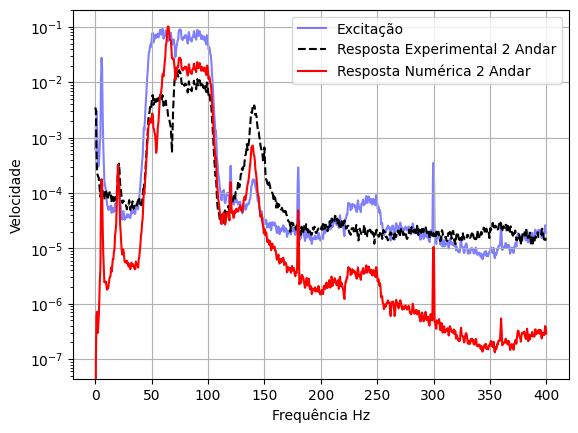

In [761]:
plt.plot(freq, np.abs(sinal_forca), 'b', label='Excitação', zorder = 0, alpha=.5)
plt.plot(freq, sinal_3, 'black', label='Resposta Experimental 2 Andar', ls='--', zorder = 5)
plt.plot(freq, X_tio_2, 'r', label= 'Resposta Numérica 2 Andar', zorder = 10)

plt.xlabel('Frequência Hz')
plt.ylabel('Velocidade')
plt.grid()
plt.legend()
plt.yscale('log')
#plt.title()
#plt.savefig("D:\\UFSC\\Vibes\\Cordioli\\Trabalho\\Grupo 6\\Magnitude_velocidade_passa_banda_2.png")
plt.show()


### Nova Magnitude da Velocidade no Terceiro Andar

In [762]:
X_tio_3 = np.abs(sinal_forca)*np.abs(H_3)

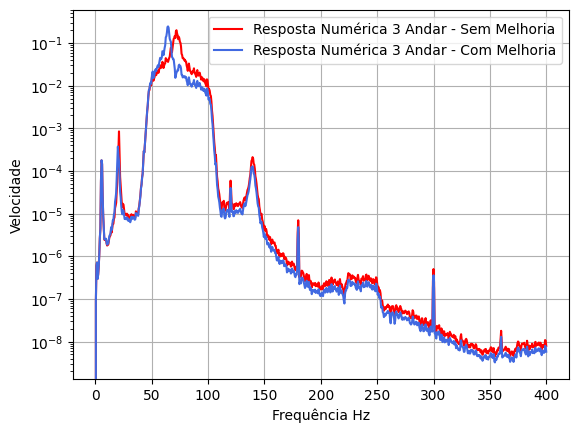

In [763]:
plt.plot(freq, X_tio_3_pas, 'r', label= 'Resposta Numérica 3 Andar - Sem Melhoria', zorder = 5)
plt.plot(freq, X_tio_3, 'royalblue', label= 'Resposta Numérica 3 Andar - Com Melhoria', zorder = 10)



plt.xlabel('Frequência Hz')
plt.ylabel('Velocidade')
plt.grid()
plt.legend()
plt.yscale('log')
#plt.title()
plt.savefig("D:\\UFSC\\Vibes\\Cordioli\\Trabalho\\Grupo 6\\Magnitude_velocidade_passa_banda_3_com_melhoria.png")
plt.show()


### Nova RMS - Primeiro Andar

In [764]:
X1_rms = 0
for i in range(0, len(X_tio_1)):
    X1_rms = X1_rms + X_tio_1[i]

print(X1_rms)

2.5990403590747975


### Nova RMS - Segundo Andar

In [765]:
X2_rms = 0
for i in range(0, len(X_tio_2)):
    X2_rms = X2_rms + X_tio_2[i]

print(X2_rms)

2.227285070854449


### Nova RMS - Terceiro Andar

In [766]:
X3_rms = 0
for i in range(0, len(X_tio_3)):
    X3_rms = X3_rms + X_tio_3[i]

print(X3_rms)

3.839560434158833


### Nova RMS Global em dB - Primeiro Andar

In [767]:
NV1 = 20 * np.log10(X1_rms/X3_rms)

print(NV1)

-3.389369684804531


### Nova RMS Global em dB - Segundo Andar

In [768]:
NV2 = 20 * np.log10(X2_rms/X3_rms)

print(NV2)

-4.730114032962236
